In [1]:
import scipy
import numpy as np
from sklearn.metrics import pairwise_distances
import networkx as nx

In [2]:
POINTS_ARRAY = np.random.uniform(size = (5,3))
POINTS_ARRAY

array([[0.9739883 , 0.63906268, 0.14989884],
       [0.39408904, 0.22856254, 0.56031336],
       [0.9280343 , 0.6816161 , 0.91877972],
       [0.76770063, 0.43263131, 0.36034897],
       [0.15027957, 0.06896272, 0.27442701]])

In [3]:
distance_matrix = pairwise_distances(POINTS_ARRAY).round(2)
distance_matrix

array([[0.  , 0.82, 0.77, 0.36, 1.01],
       [0.82, 0.  , 0.79, 0.47, 0.41],
       [0.77, 0.79, 0.  , 0.63, 1.18],
       [0.36, 0.47, 0.63, 0.  , 0.72],
       [1.01, 0.41, 1.18, 0.72, 0.  ]])

In [4]:
mst = scipy.sparse.csgraph.minimum_spanning_tree(distance_matrix).toarray()
mst

array([[0.  , 0.  , 0.  , 0.36, 0.  ],
       [0.  , 0.  , 0.  , 0.47, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.63, 0.  , 0.  ],
       [0.  , 0.41, 0.  , 0.  , 0.  ]])

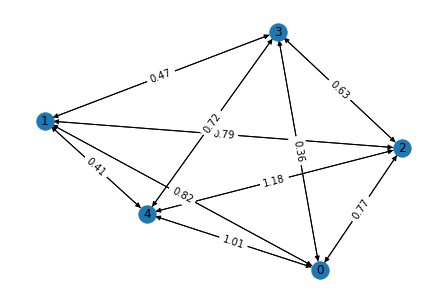

In [5]:
G = nx.from_numpy_matrix(distance_matrix, create_using=nx.DiGraph)
layout = nx.spring_layout(G)
nx.draw(G, layout, with_labels = True)
labels = nx.get_edge_attributes(G, "weight")
_ = nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=labels)

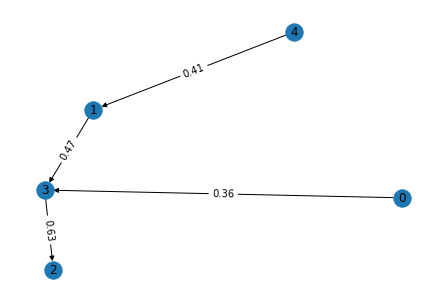

In [6]:
G = nx.from_numpy_matrix(mst, create_using=nx.DiGraph)
layout = nx.spring_layout(G)
nx.draw(G, layout, with_labels = True)
labels = nx.get_edge_attributes(G, "weight")
_ = nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=labels)